In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [9]:
datavis = pd.read_csv('./ready/datavis.csv')
print (datavis)

                                           review_body review_rating
0    wisata bal unjung pantai nikmat indah pandang ...           pos
1    sejuk rindang cocok tenang jenak kota cocok in...           pos
2    kerreeeeenn keceeee indaaahhmantaaapppemandang...           pos
3    megantar teman usa tegalakang rice terracegian...           neg
4    suka banget main salah kawasan ubud nya indah ...           pos
5    sistem terasering berundakundak terap masyarak...           neg
6    pandang tegalalang pukau mebuat mengalihakan p...           pos
7    tegalalang rice terracepemandangan alam alami ...           pos
8    cocok ramai kota hijau padi landskap tani telu...           pos
9             indah toko turis turun sawah cari tenang           pos
10   wisata bal unjung pantai nikmat indah pandang ...           pos
11   sejuk rindang cocok tenang jenak kota cocok in...           pos
12   kerreeeeenn keceeee indaaahhmantaaapppemandang...           pos
13   megantar teman usa tegalakang

In [11]:
pos = []
neg = []

for index, row in datavis.iterrows():
    if row['review_rating'] == 'pos':
        pos.append(row['review_body'])
    else:
        neg.append(row['review_body'])
        
# print (pos)
# print (neg)

['megantar teman usa tegalakang rice terracegianyarubudbaliindonesiamungkin ketemu balisampai jumpa', 'sistem terasering berundakundak terap masyarakat bal lokasi bukit tegalalang area sawah relatif luas lokasi strategis mudah jangkau ubud arah tuju gunung batur tegalalang populer turis lokal mancanegara atraksi utama susur sawah kali tegalalang kali teman turun lembah abadi foto kali turun lembah lumayan sulit temu jalan turun jalan setapak andal guide lokal jalan tantang hafal nyasar tanah basahlembek nyaman saran sih enak pakai sandal parkir motor seberang jalan jalan arah kiri jalan mudah turun lembah suka tantang yah gakpapa jalan andal guide lokal cicip kopi luwak lihat luwak guide lokal', 'megantar teman usa tegalakang rice terracegianyarubudbaliindonesiamungkin ketemu balisampai jumpa', 'sistem terasering berundakundak terap masyarakat bal lokasi bukit tegalalang area sawah relatif luas lokasi strategis mudah jangkau ubud arah tuju gunung batur tegalalang populer turis lokal ma

In [19]:
cv_pos=CountVectorizer()
cv_neg=CountVectorizer()
word_count_pos_vector=cv_pos.fit_transform(pos)
word_count_neg_vector=cv_neg.fit_transform(neg)

In [20]:
list(cv_pos.vocabulary_.keys())[:20]
list(cv_neg.vocabulary_.keys())[:20]

['megantar',
 'teman',
 'usa',
 'tegalakang',
 'rice',
 'terracegianyarubudbaliindonesiamungkin',
 'ketemu',
 'balisampai',
 'jumpa',
 'sistem',
 'terasering',
 'berundakundak',
 'terap',
 'masyarakat',
 'bal',
 'lokasi',
 'bukit',
 'tegalalang',
 'area',
 'sawah']

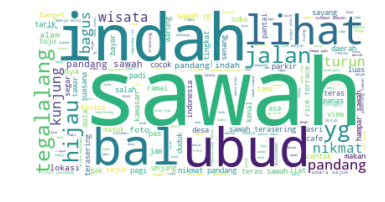

In [26]:
text = " ".join(kata for kata in pos)

wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

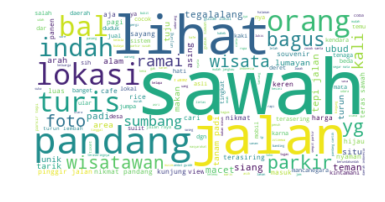

In [27]:
text = " ".join(kata for kata in neg)

wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
bali_mask = np.array(Image.open("img/svg-512.png"))
bali_mask

array([[[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       ...,

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [68, 68, 64,  5],
        [68, 68, 64,  3],
        [68, 68, 64,  2]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [68, 68, 64,  3],
        [68, 68, 64,  3],
        [68, 68, 64,  1]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [68, 68, 64,  2],
        [68, 68

In [29]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [34]:
transformed_bali_mask = np.ndarray((bali_mask.shape[0],bali_mask.shape[1]), np.int32)

for i in range(len(bali_mask)):
    transformed_bali_mask[i] = list(map(transform_format, bali_mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

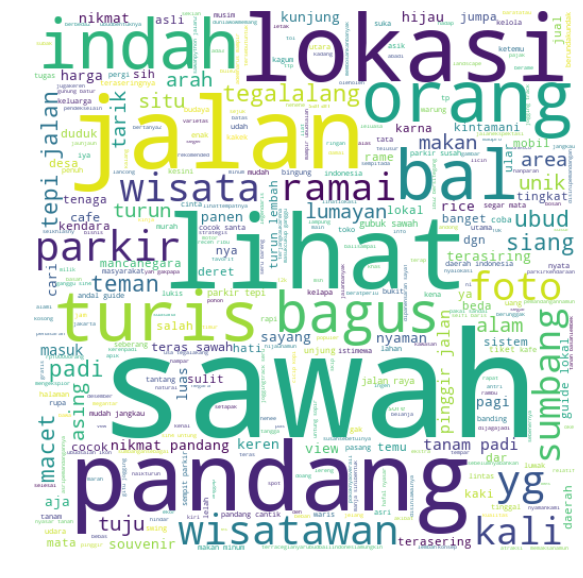

In [37]:
wc = WordCloud(background_color="white", max_words=1000, mask=bali_mask,
               contour_width=3)
# , contour_color='firebrick'
# Generate a wordcloud
wc.generate(text)

# store to file
# wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()